Student Names: Shreyash Shashikant Kumbhar, Sarthak Santosh Shinde <br>
Student IDs: 21263426, 21261592 <br>
Student Email IDs: shreyash.kumbhar2@mail.dcu.ie, sarthak.shinde4@mail.dcu.ie <br>
Subject: Data Analytics and Data Mining <br>
Lecturer: Andrew Mccarren <br>
College: Dublin City University <br>

# Bank Customer Churn Prediction

**Research Question**<br>
* How are consumers churned to be predicted?  

**Analysis Steps are as follows:** <br>
        1. Importing Libraries <br>
        2. Data Cleaning, Preparation, EDA <br>
        3. Data Mining Algorithms <br>

## 1. Importing Libraries

In [182]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt 
import seaborn as sns 
sns.set_style('darkgrid')
%matplotlib inline 
from collections import Counter 
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.metrics import confusion_matrix, classification_report 

### Bank Customer Churn Directory 

In [183]:
# Load the dataset
dfChurn = pd.read_csv("Churn Modeling.csv")
print(f"Dataframe dimensions: {dfChurn.shape}")
dfChurn.head()

Dataframe dimensions: (10000, 14)


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [184]:
dfChurn.info()

<class 'pandas.core.frame.DataFrame'>

RangeIndex: 10000 entries, 0 to 9999

Data columns (total 14 columns):

 #   Column           Non-Null Count  Dtype  

---  ------           --------------  -----  

 0   RowNumber        10000 non-null  int64  

 1   CustomerId       10000 non-null  int64  

 2   Surname          10000 non-null  object 

 3   CreditScore      10000 non-null  int64  

 4   Geography        10000 non-null  object 

 5   Gender           10000 non-null  object 

 6   Age              10000 non-null  int64  

 7   Tenure           10000 non-null  int64  

 8   Balance          10000 non-null  float64

 9   NumOfProducts    10000 non-null  int64  

 10  HasCrCard        10000 non-null  int64  

 11  IsActiveMember   10000 non-null  int64  

 12  EstimatedSalary  10000 non-null  float64

 13  Exited           10000 non-null  int64  

dtypes: float64(2), int64(9), object(3)

memory usage: 1.1+ MB


There are no missing values in our dataset.

##  2. Data Cleaning, Preparation, EDA 

In [185]:
# List number of unique customer IDs
dfChurn.CustomerId.nunique()

10000

### All IDs are unique, which means no duplicates.

In [186]:
dfChurn.duplicated().sum()

0

In [187]:
'''To make dataframe easily readable we will drop features not needed for machine learning: RowNumber & CustomerId'''
dfChurn.drop(dfChurn.columns[[0,1]], axis=1, inplace=True)
unique_vals = {}
print('Unique count values for feature:\n')
for column in dfChurn.columns:
    unique_vals[column]=dfChurn[column].unique()
    print(len(unique_vals[column]),' ' , column)

Unique count values for feature:



2932   Surname

460   CreditScore

3   Geography

2   Gender

70   Age

11   Tenure

6382   Balance

4   NumOfProducts

2   HasCrCard

2   IsActiveMember

9999   EstimatedSalary

2   Exited


The numbers of unique values for Gender, HasCrCard, IsActiveMember, and Exited are legit.

### Computing the number of exited and not-exited clients:

In [188]:
exe = len(dfChurn[dfChurn['Exited'] == 1]['Exited'])
ntexe = len(dfChurn[dfChurn['Exited'] == 0]['Exited'])
exe_perc = round(exe/len(dfChurn)*100,1)
ntexe_perc = round(ntexe/len(dfChurn)*100,1)
print('Exited the program: {} ({}%)'.format(exe, exe_perc))
print('Not have exited the program: {} ({}%)'.format(ntexe, ntexe_perc))

Exited the program: 2037 (20.4%)

Not have exited the program: 7963 (79.6%)


Approximately 20% of customers left the bank, while 80% remained.As the objective here is to determine which of the clients are most risky to stop providing services to the bank, we have a classification challenge. 

###  Visualization for features

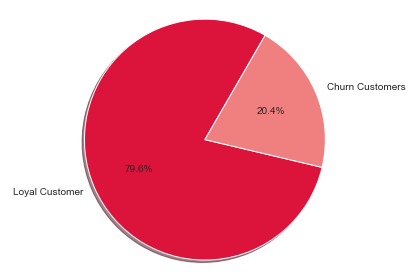

In [189]:
#No of Exited vs Active  get the percentage  with pie chart
ExitedValues = dfChurn.Exited.value_counts()
labels = ["Loyal Customer","Churn Customers"]
colors = ['#DC143C', '#F08080']
fig1, f1 = plt.subplots()
f1.pie(ExitedValues,labels=labels, colors = colors, autopct='%1.1f%%',shadow=True, startangle=60) 
f1.axis('equal')
plt.tight_layout()
plt.show()

Gender and Geography are two columns that need to be converted into numeric form. 

In [166]:
dfChurn['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [167]:
dfChurn['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [168]:
dfChurn.iloc[:, 3:13].head(10)

,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,Female,42,2,0.00,1,1,1,101348.88,1
1,Female,41,1,83807.86,1,0,1,112542.58,0
2,Female,42,8,159660.80,3,1,0,113931.57,1
3,Female,39,1,0.00,2,0,0,93826.63,0
4,Female,43,2,125510.82,1,1,1,79084.10,0
5,Male,44,8,113755.78,2,1,0,149756.71,1
6,Male,50,7,0.00,2,1,1,10062.80,0
7,Female,29,4,115046.74,4,1,0,119346.88,1
8,Male,44,4,142051.07,2,0,1,74940.50,0
9,Male,27,2,134603.88,1,1,1,71725.73,0


### Correlation of each features

### This shows Age and Balance have a much bigger impact on churning.

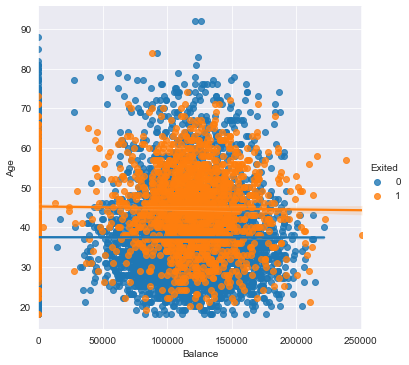

In [169]:
sns.lmplot(x="Balance", y="Age", hue="Exited", data=dfChurn );

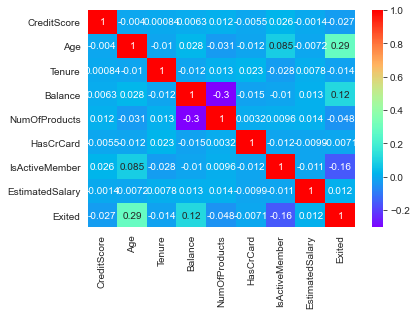

In [170]:
sns.heatmap(dfChurn[['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 
                  'HasCrCard','IsActiveMember', 'EstimatedSalary', 'Exited']].corr(), cmap='rainbow',annot=True);

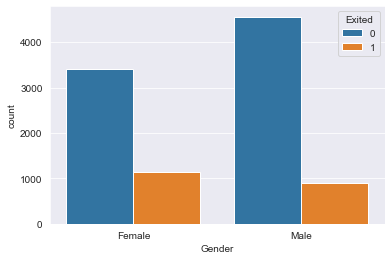

In [171]:
sns.countplot(x='Gender',data=dfChurn, hue='Exited');

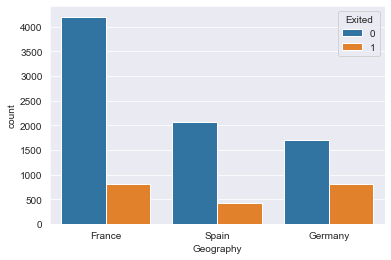

In [172]:
sns.countplot(x='Geography',data=dfChurn, hue='Exited');

From the overview statistics and histograms, we can conclude that all functions are OK.
We see no extreme values for any of the characteristics.

Seaborn's heatmap() function to visualize the correlation grid.

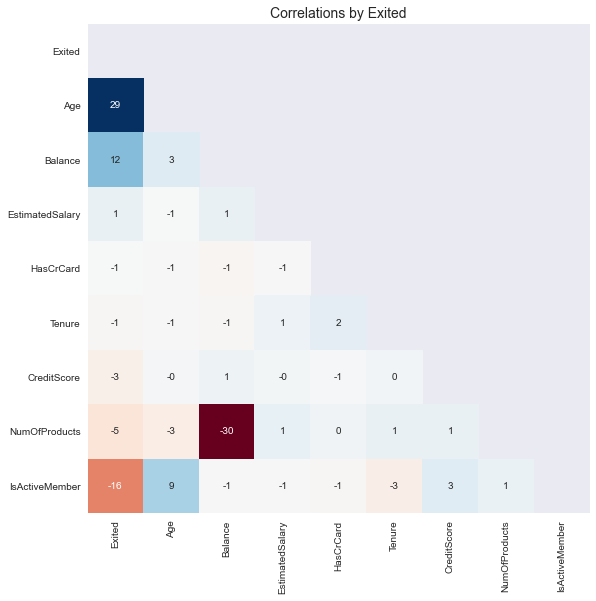

In [173]:
correlations = dfChurn.corr() # Calculate correlations between numeric features
sort_corr_cols = correlations.Exited.sort_values(ascending=False).keys() # sort features in order of their correlation with "Exited"
sort_corr = correlations.loc[sort_corr_cols,sort_corr_cols]
corr_mask = np.zeros_like(correlations) # Generate a mask for the upper triangle
corr_mask[np.triu_indices_from(corr_mask)] = 1
plt.figure(figsize=(9,9)) # Make the figsize 9x9
sns.heatmap(sort_corr*100, 
                cmap='RdBu', 
                annot=True,
                fmt='.0f',
                mask=corr_mask,
                cbar=False) # Plot heatmap of annotated correlations; change background to white
plt.title('Correlations by Exited', fontsize=14)
plt.yticks(rotation=0)
plt.show()

Very weak correlations in general. There is only a weak positive correlation with age, a very weak positive correlation with balance, and a very weak negative correlation with the number of products and membership.

Percentage per class created for the target feature.

In [142]:
y = dfChurn.Exited # Define our target variable

In [143]:
y.shape

(10000,)

In [190]:
# percentage per class of target feature 
from collections import Counter
def class_count(a):
    counter=Counter(a)
    kv=[list(counter.keys()),list(counter.values())]
    dff = pd.DataFrame(np.array(kv).T, columns=['Exited','Count'])
    dff['Count'] = dff['Count'].astype('int64')
    dff['%'] = round(dff['Count'] / a.shape[0] * 100, 2)
    return dff.sort_values('Count',ascending=False)

In [175]:
dfcc = class_count(y)
dfcc

,Exited,Count,%
1,0,7963,79.63
0,1,2037,20.37


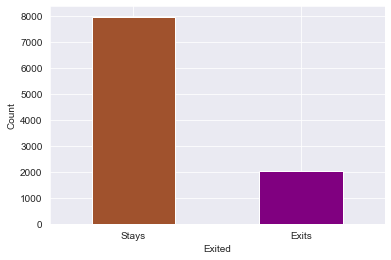

In [176]:
# Plot distribution of target variable, Exited column
labels=['Stays', 'Exits']
dfcc.plot.bar(x='Exited', y='Count', color=['#A0522D', '#800080'], legend=False)
plt.xticks(dfcc['Exited'], labels, rotation=0)
plt.ylabel('Count')
plt.show()

YYou will see how imbalanced our dataset is. The major class, "Stays" (0), has about 80%, while the minority class, "Exits" (1), has about 20%. 

Splitting our dataset into training and test data mining

In [177]:
dfChurn.head(5)

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [178]:
X = dfChurn.iloc[:, 1:11].values
y = dfChurn.iloc[:, 11].values

In [179]:
pd.DataFrame(X).head(5)

,0,1,2,3,4,5,6,7,8,9
0,619,France,Female,42,2,0,1,1,1,101349
1,608,Spain,Female,41,1,83807.9,1,0,1,112543
2,502,France,Female,42,8,159661,3,1,0,113932
3,699,France,Female,39,1,0,2,0,0,93826.6
4,850,Spain,Female,43,2,125511,1,1,1,79084.1


In [123]:
pd.DataFrame(y).head(5)

,0
0,1
1,0
2,1
3,0
4,0


Using LabelEncoder, encode the Gender and Geography columns in numeric format.

In [191]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_X_1 = LabelEncoder()
X[:, 1] = labelencoder_X_1.fit_transform(X[:, 1])

In [152]:
labelencoder_X_2 = LabelEncoder()
X[:, 2] = labelencoder_X_2.fit_transform(X[:, 2])


In [153]:
X

array([[619, 0, 0, ..., 1, 1, 101348.88],
       [608, 2, 0, ..., 0, 1, 112542.58],
       [502, 0, 0, ..., 1, 0, 113931.57],
       ...,
       [709, 0, 0, ..., 0, 1, 42085.58],
       [772, 1, 1, ..., 1, 0, 92888.52],
       [792, 0, 0, ..., 1, 0, 38190.78]], dtype=object)

OneHotEncoder

In [154]:
import warnings
warnings.filterwarnings("ignore")

In [155]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
label_encoder_x_1 = LabelEncoder()
X[: , 2] = label_encoder_x_1.fit_transform(X[:,2])
transformer = ColumnTransformer(
    transformers=[
        ("OneHot",        # Just a name
         OneHotEncoder(), # The transformer class
         [1]              # The column(s) to be applied on.
         )
    ],
    remainder='passthrough' # donot apply anything to the remaining columns
)
X = transformer.fit_transform(X.tolist())
X = X.astype('float64')

In [156]:
X = X[:, 1:]
pd.DataFrame(X).head(7)

,0,1,2,3,4,5,6,7,8,9,10
0,0.0,0.0,619.0,0.0,42.0,2.0,0.00,1.0,1.0,1.0,101348.88
1,0.0,1.0,608.0,0.0,41.0,1.0,83807.86,1.0,0.0,1.0,112542.58
2,0.0,0.0,502.0,0.0,42.0,8.0,159660.80,3.0,1.0,0.0,113931.57
3,0.0,0.0,699.0,0.0,39.0,1.0,0.00,2.0,0.0,0.0,93826.63
4,0.0,1.0,850.0,0.0,43.0,2.0,125510.82,1.0,1.0,1.0,79084.10
5,0.0,1.0,645.0,1.0,44.0,8.0,113755.78,2.0,1.0,0.0,149756.71
6,0.0,0.0,822.0,1.0,50.0,7.0,0.00,2.0,1.0,1.0,10062.80


In [181]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

# 3. Data Mining Algorithms 

### Logistic Regression

In [95]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train,y_train)
predictions = classifier.predict(X_test)

In [96]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import fbeta_score, accuracy_score

print(classification_report(y_test,predictions))
print(confusion_matrix(y_test, predictions))
print('   TN    FP')
print('   FN    TP')
print('Accuracy Score :',accuracy_score(y_test,predictions))
print('F Score',fbeta_score(y_test,predictions,2))

              precision    recall  f1-score   support



           0       0.79      0.98      0.88      1975

           1       0.34      0.05      0.08       525



    accuracy                           0.78      2500

   macro avg       0.57      0.51      0.48      2500

weighted avg       0.70      0.78      0.71      2500



[[1928   47]

 [ 501   24]]

   TN    FP

   FN    TP

Accuracy Score : 0.7808

F Score 0.05527406725011515


The accuracy of this model is 78%, with a 55% F-score but a very low recall score. 

### Decision Tree Model

In [97]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)
predictions = dtree.predict(X_test)

In [98]:
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test, predictions))
print('   TN    FP')
print('   FN    TP')
print('Accuracy Score :',accuracy_score(y_test,predictions))
print('F Score',fbeta_score(y_test,predictions,2))

              precision    recall  f1-score   support



           0       0.87      0.86      0.86      1975

           1       0.49      0.52      0.50       525



    accuracy                           0.79      2500

   macro avg       0.68      0.69      0.68      2500

weighted avg       0.79      0.79      0.79      2500



[[1693  282]

 [ 254  271]]

   TN    FP

   FN    TP

Accuracy Score : 0.7856

F Score 0.5107425555974368


This model has a 78% Accuracy and a 51% F-score. Also, a 53% recall score for True Positive cases of Exited